Import the relevant libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta,date
from sklearn.cluster import KMeans # for clustering

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import the dataset

In [2]:
#import the dataset from 2 worksheets
with pd.ExcelFile('online_retail_II.xlsx') as xls:
    data1 = pd.read_excel(xls, 'Year 2009-2010')
    data2 = pd.read_excel(xls, 'Year 2010-2011')
#add two sheets into a single dataframe
data = pd.concat([data1, data2])

Statistical description of the data

In [3]:
#statistical distribution
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


View format of the data

In [4]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Check the information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


####Data Cleaning
Check missing values

In [6]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

As CustomerID is the most important column, drop all the rows without customerID. 

In [7]:
data.dropna(subset=['Customer ID'], how='all', inplace=True)

Check the number of countries

In [8]:
data['Country'].nunique()

41

Check the count for each country

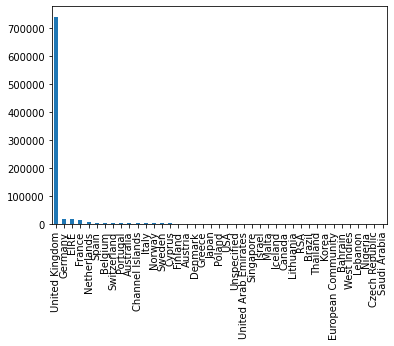

In [9]:
data.Country.value_counts()[:43].plot(kind='bar')

As it is mostly UK, filter out data only for UK. 

In [10]:
data = data[data.Country=='United Kingdom']

Drop the column Country

In [11]:
data.drop('Country', axis=1, inplace=True)

Check the Price

In [12]:
print(sorted(data.Price.unique().tolist()))

[0.0, 0.001, 0.01, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.24, 0.25, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.44, 0.45, 0.48, 0.49, 0.5, 0.52, 0.53, 0.55, 0.56, 0.58, 0.59, 0.6, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.72, 0.73, 0.74, 0.75, 0.76, 0.78, 0.79, 0.8, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.94, 0.95, 0.98, 1.0, 1.01, 1.02, 1.04, 1.05, 1.06, 1.08, 1.1, 1.11, 1.12, 1.15, 1.17, 1.18, 1.19, 1.2, 1.23, 1.24, 1.25, 1.27, 1.3, 1.31, 1.32, 1.33, 1.38, 1.4, 1.42, 1.43, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.53, 1.55, 1.57, 1.58, 1.59, 1.6, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.74, 1.75, 1.76, 1.77, 1.79, 1.8, 1.85, 1.86, 1.87, 1.88, 1.9, 1.92, 1.93, 1.95, 1.96, 1.97, 1.98, 2.0, 2.02, 2.04, 2.08, 2.1, 2.12, 2.14, 2.15, 2.16, 2.17, 2.2, 2.21, 2.22, 2.25, 2.26, 2.29, 2.3, 2.31, 2.32, 2.33, 2.

Filter out rows with Price greater than 0.001

In [13]:
data = data[(data['Price']>0.001)]

Check the StockCode

In [14]:
print(data.StockCode.unique().tolist())

[85048, '79323P', '79323W', 22041, 21232, 22064, 21871, 21523, 22350, 22349, 22195, 22353, '48173C', 21755, 21754, 84879, 22119, 22142, 22296, 22295, 22109, 22107, 22194, '35004B', 82582, 21181, 21756, 21333, '84596F', '84596L', 22111, 22143, 22145, 22130, 21364, 21360, 21351, 21352, 35400, 20695, 37370, 10002, '84507B', 20703, 21987, 21989, '84970S', 20971, 22271, 22272, 22274, 21912, 22112, 21329, 21252, 21100, 21033, 20711, 21410, 21411, '84031A', '84031B', '84032A', '84032B', '84519A', '84519B', '85132A', '85132C', '85183A', '85183B', 22321, 22138, '84029E', 21955, '84899E', '85123A', 21582, 21586, 21590, 22091, '84251J', 22024, 22026, 22029, 22025, 22031, 21428, 21430, 21916, 21790, 21888, 85178, 20754, 21035, '82001S', 82580, 85150, 21041, '35916C', '35916B', 22180, 22128, 22163, 35951, 22253, 84988, 22219, '18097C', 21299, 21099, 21085, 21929, 22241, 21091, 21733, 22178, 22125, 21671, 22086, 22294, 22199, 22083, 22114, 21485, 21928, '85099B', 22356, 20724, 21592, 20725, 20728, 2

Rows with data related to Bank Charges, Adjust, Postage etc. are removed as it does not signifies the amount spent by  the customer. 

In [15]:
data = data[~data['StockCode'].isin(['TEST001', 'ADJUST', 'ADJUST2', 'BANK CHARGES', 'C2', 'CRUB', 'M', 'PADS', 'POST', 'D', 'TEST002', 'CRUK', 'DOT', 'AMAZONFEE', 'S'])]

Check Quantity column

Find data where quantity is less than or equal to 0

In [16]:
data[data.Quantity<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
197,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
198,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
199,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
200,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0


Number of rows where Quantity is less than 0. 

In [17]:
data[(data['Quantity']<0)].shape[0]

15376

Drop the index

In [18]:
data.reset_index(drop=True, inplace=True)

Split data into 2 dataframes to fix all the rows where quantity is less than zero and price is greater than zero as these could be the transactions that are cancelled/returned. 

In [19]:
#splitting the dataframe into 2 to fix all the rows where quantity is less than zero as doing it together takes a lot of time. 
data1 = data[data.Quantity<0]
data2 = data[data.Quantity>=0]
data1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
157,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
158,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
159,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
160,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0
161,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0


In [20]:
#check the data
data1['Price'] = data1['Price'] * -1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#concatenate both datasets again
data = pd.concat([data1, data2])

Change the datatype of InvoiceDate column from datetime to Date for convenience

In [22]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).apply(lambda x: x.date())

Rename the column Customer ID as CustomerID

In [23]:
data.rename(columns = {'Customer ID':'CustomerID'}, inplace = True)

In [24]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID
157,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01,-4.25,17592.0
158,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01,-4.25,17592.0
159,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01,-4.25,17592.0
160,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01,-4.25,17592.0
161,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01,-4.25,17592.0


####Feature Extraction(LRFM)

In [25]:
#create 8m and 16m dataframes to extract LRFM values for customers and calculate their CLV
trans_8m = data[(data.InvoiceDate < date(2010,8,1)) & (data.InvoiceDate >= date(2009,12,1))].reset_index(drop=True)
trans_16m = data[(data.InvoiceDate >= date(2010,8,1)) & (data.InvoiceDate <= date(2011,12,9))].reset_index(drop=True)

#create customers dataframe for assigning clustering
customers = pd.DataFrame(trans_8m['CustomerID'].unique())
customers.columns = ['CustomerID']

In [26]:
#function to assign clusters according to their values and assign them a cluster number
#order cluster method - to order the clusters with different values
def order_cluster(cluster_field, target_field,data,ascending):
    data_new = data.groupby(cluster_field)[target_field].mean().reset_index()
    data_new = data_new.sort_values(by=target_field,ascending=ascending).reset_index(drop=True)
    data_new['index'] = data_new.index
    data_final = pd.merge(data,data_new[[cluster_field,'index']], on=cluster_field)
    data_final = data_final.drop([cluster_field],axis=1)
    data_final = data_final.rename(columns={"index":cluster_field})
    return data_final

In [27]:
#calcuate frequency score
#find the number of purchases for every customer in 8 months
trans_frequency = trans_8m.groupby('CustomerID').InvoiceDate.count().reset_index()
trans_frequency.columns = ['CustomerID','Frequency']
customers = pd.merge(customers, trans_frequency, on='CustomerID')

In [28]:
#function to plot elbow method for a feature
def find_cluster(column):
  sse={}
  trans = customers[[column]]
  for k in range(1, 10):
      kmeans = KMeans(n_clusters=k, max_iter=1000).fit(trans)
      trans["clusters"] = kmeans.labels_
      sse[k] = kmeans.inertia_ 
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel("Number of clusters")
  plt.show()

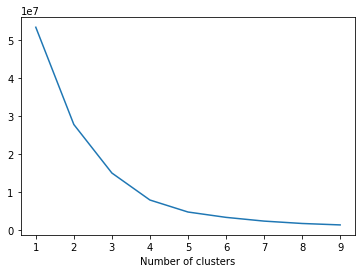

In [29]:
find_cluster('Frequency')

In [30]:
#cluster customers into 4 clusters based on frequency 
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers[['Frequency']])
customers['FrequencyScore'] = kmeans.predict(customers[['Frequency']])
#order the clusters based on frequency score
customers = order_cluster('FrequencyScore', 'Frequency',customers,True)

In [31]:
#calculate recency score
#find recent purchase date for all customers
trans_max_purchase = trans_8m.groupby('CustomerID').InvoiceDate.max().reset_index()
trans_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
#calculate the recency - difference between latest purchase date of the customer and the latest purchase of the data
trans_max_purchase['Recency'] = (trans_max_purchase['MaxPurchaseDate'].max() - trans_max_purchase['MaxPurchaseDate']).dt.days
customers = pd.merge(customers, trans_max_purchase[['CustomerID','Recency']], on='CustomerID')

In [32]:
# find_cluster('Recency')

In [33]:
#cluster customers into 4 clusters based on recency score
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers[['Recency']])
customers['RecencyScore'] = kmeans.predict(customers[['Recency']])
#order the clusters based on  recency score
customers = order_cluster('RecencyScore', 'Recency',customers,False)

In [34]:
#calculate length score
#find first purchase date for all customers
trans_min_purchase = trans_8m.groupby('CustomerID').InvoiceDate.min().reset_index()
trans_min_purchase.columns = ['CustomerID','MinPurchaseDate']
#merge 2 dataframes to calculate the length
trans_ln = pd.merge(trans_min_purchase, trans_max_purchase, on='CustomerID')
#calculate the length - difference between first purchase date of the customer and last purchase of the customer
trans_ln['Length'] = (trans_ln['MaxPurchaseDate'] - trans_ln['MinPurchaseDate']).dt.days
customers = pd.merge(customers, trans_ln[['CustomerID','Length']], on='CustomerID')

In [35]:
# find_cluster('Length')

In [36]:
#cluster customers into 4 clusters based on length score
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers[['Length']])
customers['LengthScore'] = kmeans.predict(customers[['Length']])
#order the clusters based on  length score
customers = order_cluster('LengthScore','Length',customers,True)

In [37]:
#calcuate monetary score
#calculate the monetary value from price and quantity
trans_8m['Monetary'] = trans_8m['Price'] * trans_8m['Quantity']
#calculate the total monetary per customer
trans_monetary = trans_8m.groupby('CustomerID').Monetary.sum().reset_index()
customers = pd.merge(customers, trans_monetary, on='CustomerID')

In [38]:
# find_cluster('Monetary')

In [39]:
#cluster customers into 4 clusters based on monetary
kmeans = KMeans(n_clusters=4)
kmeans.fit(customers[['Monetary']])
customers['MonetaryScore'] = kmeans.predict(customers[['Monetary']])
#order the clusters based on monetary score
customers = order_cluster('MonetaryScore', 'Monetary',customers,True)

In [40]:
customers.head()

,CustomerID,Frequency,FrequencyScore,Recency,RecencyScore,Length,LengthScore,Monetary,MonetaryScore
0,17592.0,26,0,241,0,0,0,296.60,0
1,17641.0,1,0,241,0,0,0,6.95,0
2,13526.0,54,0,241,0,0,0,1421.40,0
3,17485.0,6,0,241,0,0,0,29.55,0
4,16541.0,39,0,238,0,0,0,428.28,0


In [41]:
#overall scoring
#calculate overall score by adding all other scores
customers['OverallScore'] = customers['RecencyScore'] + customers['FrequencyScore'] + (2*customers['MonetaryScore']) + customers['LengthScore']

#to see average value of Overallscore
customers.groupby('OverallScore')['Recency', 'Frequency', 'Monetary', 'Length'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Recency,Frequency,Monetary,Length
OverallScore,,,,
0,215.668790,20.605096,282.979713,1.828025
1,141.000000,22.836735,360.715026,5.033163
2,86.339960,28.960239,413.336223,18.419483
3,47.139059,37.807771,629.834785,37.312883
4,52.714689,61.903955,1219.969435,112.807910
5,30.767213,83.006557,1435.412426,144.872131
6,18.449102,98.892216,1749.921018,198.485030
7,16.471338,241.547771,2982.455669,212.630573
8,10.120000,188.400000,8122.372800,216.000000


In [42]:
#Segment the customers based on overall score
customers['Segment'] = 'Low-Value'
customers.loc[customers['OverallScore']>3,'Segment'] = 'Mid-Value' 
customers.loc[customers['OverallScore']>6,'Segment'] = 'High-Value'

customers.head()

,CustomerID,Frequency,FrequencyScore,Recency,RecencyScore,Length,LengthScore,Monetary,MonetaryScore,OverallScore,Segment
0,17592.0,26,0,241,0,0,0,296.60,0,0,Low-Value
1,17641.0,1,0,241,0,0,0,6.95,0,0,Low-Value
2,13526.0,54,0,241,0,0,0,1421.40,0,0,Low-Value
3,17485.0,6,0,241,0,0,0,29.55,0,0,Low-Value
4,16541.0,39,0,238,0,0,0,428.28,0,0,Low-Value


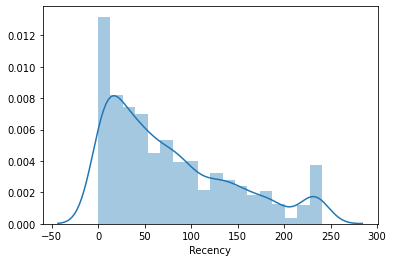

In [43]:
#Recency distribution
ax = sns.distplot(customers['Recency'])

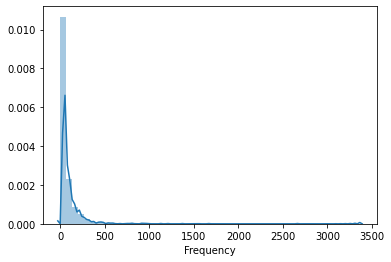

In [44]:
#Frequency distribution
ax = sns.distplot(customers['Frequency'])

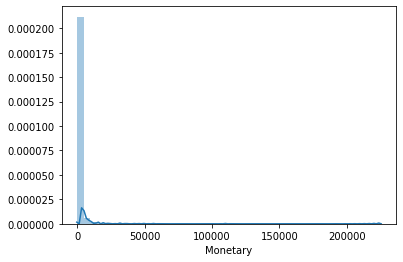

In [45]:
#Monetary distribution
ax = sns.distplot(customers['Monetary'])

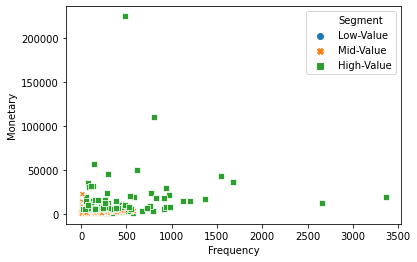

In [46]:
#Frequency vs monetary plot different segments
ax = sns.scatterplot(x="Frequency", y="Monetary", hue="Segment", style="Segment", data=customers)

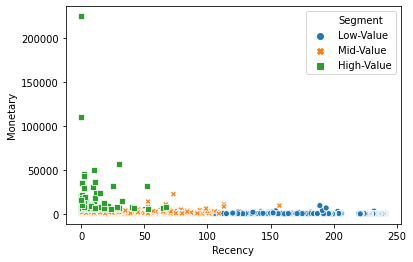

In [47]:
#Recency vs monetary plot different segments
ax = sns.scatterplot(x="Recency", y="Monetary", hue="Segment", style="Segment", data=customers)

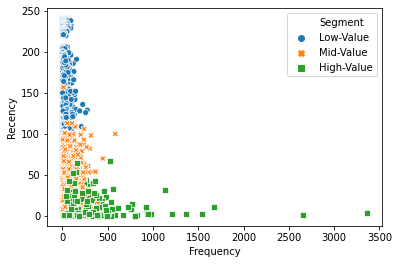

In [48]:
#Frequency vs Recency plot different segments
ax = sns.scatterplot(x="Frequency", y="Recency", hue="Segment", style="Segment", data=customers)

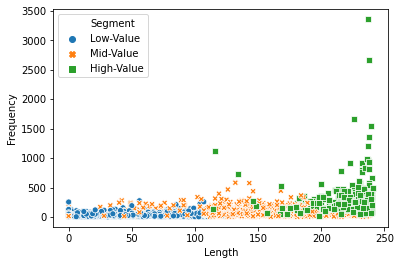

In [49]:
#Length vs Frequency plot different segments
ax = sns.scatterplot(x="Length", y="Frequency", hue="Segment", style="Segment", data=customers)

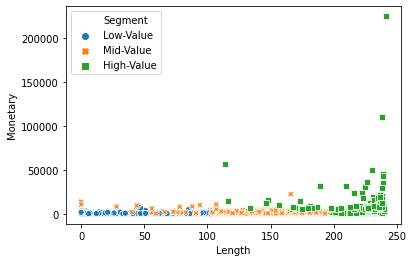

In [50]:
#Length vs Monetary plot different segments
ax = sns.scatterplot(x="Length", y="Monetary", hue="Segment", style="Segment", data=customers)

In [51]:
#3D plot of customer segments based on well-known RFM values
import plotly.express as px
fig = px.scatter_3d(customers, x='Recency', y='Frequency', z='Monetary',color='Segment', width=800, height=600)
fig.show()

####CLV Calculation

In [52]:
#calculate CLV for last 16 months as the customer lifetime value and create a new dataframe for it
trans_16m['CLV'] = trans_16m['Price'] * trans_16m['Quantity']
#Calculate customer lifetime value per customer
trans_16m_customers = trans_16m.groupby('CustomerID')['CLV'].sum().reset_index()
trans_16m_customers.columns = ['CustomerID','CLV']

In [53]:
#merge both datasets to create the join features with labels
trans_merge = pd.merge(customers, trans_16m_customers, on='CustomerID', how='left')
#fill the CLV of customers who haven't purchased with 0
trans_merge = trans_merge.fillna(0)

In [54]:
#remove outliers
trans_merge = trans_merge[trans_merge['CLV']<trans_merge['CLV'].quantile(0.99)]

#creating 3 clusters for customer lifetime value i.e, CLV
kmeans = KMeans(n_clusters=3)
kmeans.fit(trans_merge[['CLV']])
trans_merge['CLVCluster'] = kmeans.predict(trans_merge[['CLV']])

#order cluster number based on LTV
trans_merge = order_cluster('CLVCluster', 'CLV',trans_merge,True)

#creatinga new cluster dataframe
trans_cluster = trans_merge.copy()

#see statistical description of CLTV
trans_cluster.groupby('CLVCluster')['CLV'].describe()

,count,mean,std,min,25%,50%,75%,max
CLVCluster,,,,,,,,
0,2387.0,757.054286,834.394341,0.00,0.000,461.27,1196.560,3114.57
1,439.0,5487.241139,1959.935713,3116.85,3863.085,4892.30,6870.830,10454.00
2,83.0,15718.151928,4771.948632,10670.49,11845.205,13768.49,18396.265,28870.11


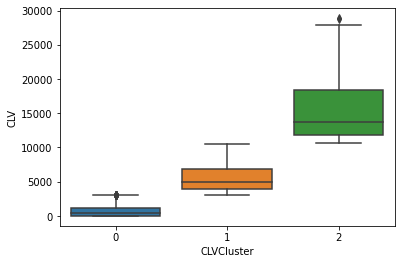

In [55]:
#Customer Lifetime Values for different CLV clusters
sns.boxplot(x = trans_cluster.CLVCluster, y = trans_cluster.CLV)
plt.show()

In [56]:
#complete dataset
trans_cluster.head()

,CustomerID,Frequency,FrequencyScore,Recency,RecencyScore,Length,LengthScore,Monetary,MonetaryScore,OverallScore,Segment,CLV,CLVCluster
0,17592.0,26,0,241,0,0,0,296.60,0,0,Low-Value,0.0,0
1,17641.0,1,0,241,0,0,0,6.95,0,0,Low-Value,0.0,0
2,13526.0,54,0,241,0,0,0,1421.40,0,0,Low-Value,0.0,0
3,17485.0,6,0,241,0,0,0,29.55,0,0,Low-Value,0.0,0
4,16541.0,39,0,238,0,0,0,428.28,0,0,Low-Value,0.0,0


In [57]:
#convert categorical columns to numerical
trans_class = pd.get_dummies(trans_cluster)

In [58]:
numerical_features = ['Recency', 'Frequency', 'Monetary', 'Length']
# Log-transforming columns to remove positive skew
for column in numerical_features:
    trans_class[column] = trans_class[column].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    trans_class[column] = np.log(trans_class[column])

####Feature Selection

In [59]:
#check correlation of other variables with the target variable
#calculate and show correlations
corr_matrix = trans_class.corr()
corr_matrix['CLVCluster'].sort_values(ascending=False)

CLVCluster            1.000000
CLV                   0.882201
Monetary              0.527147
OverallScore          0.472872
Segment_High-Value    0.446414
LengthScore           0.412085
MonetaryScore         0.404303
FrequencyScore        0.404261
Frequency             0.390223
Length                0.321374
RecencyScore          0.270934
Segment_Mid-Value     0.140352
CustomerID           -0.018236
Recency              -0.307597
Segment_Low-Value    -0.374849
Name: CLVCluster, dtype: float64

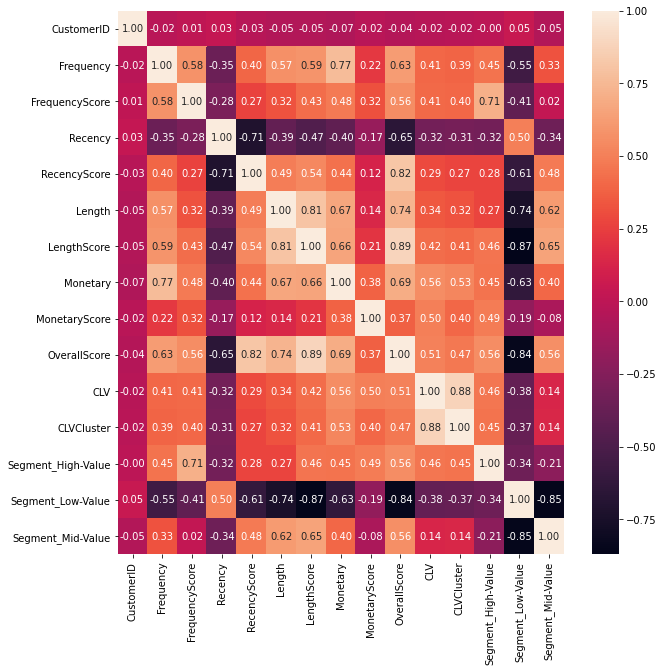

In [60]:
#check the correlation between all the variables to find variables which are highly correlated
corrmat = trans_class.corr()
plt.figure(figsize=(10,10))
#plot the correlation heatmap
sns.heatmap(corrmat, annot=True, fmt=".2f")

In [61]:
#remove features which are highly are highlt positive correlated and negative correlated with other variables
acx = ['RecencyScore','Segment_Low-Value','FrequencyScore','MonetaryScore','LengthScore','OverallScore']
trans_class.drop(acx, axis=1, inplace=True)

####Modelling

In [62]:
from sklearn.model_selection import train_test_split

#create x and y, x will be feature set and y is the label - CLV

x = trans_class.drop(['CLVCluster','CLV', 'CustomerID'],axis=1)
y = trans_class['CLVCluster']

#scale the feature set to normalize the range of independent features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=list(x.columns))

# #split training and test sets in the ratio 8:2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [63]:
#function to create confusion matrix
def confusion_mat(cm):
# Normalise
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(4,4))
  sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Low-CLV', 'Mid-CLV', 'High-CLV'], yticklabels=['Low-CLV', 'Mid-CLV', 'High-CLV'])
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

In [64]:
#import libraries for metrics and time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

In [65]:
#import libraries for  machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost

Decision Tree Classifier

In [66]:
#DECISION TREE
clf_dt = tree.DecisionTreeClassifier(random_state=42)
#train the model using train set
clf_dt.fit(x_train,y_train)
#make predictions using the train set
y_pred_train_dt=clf_dt.predict(x_train)
#training accuracy
accuracy_dt= accuracy_score(y_train, y_pred_train_dt)
print("Training Accuracy ",accuracy_dt*100)
#make predictions using the test set
y_pred_dt =clf_dt.predict(x_test)
#print the classification report
print(classification_report(y_test, y_pred_dt))
#testing accuracy
accuracy_dt_t= accuracy_score(y_test, y_pred_dt)
print("Testing Accuracy ",accuracy_dt_t*100 )

Training Accuracy  100.0
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       480
           1       0.37      0.42      0.39        81
           2       0.43      0.43      0.43        21

    accuracy                           0.80       582
   macro avg       0.57      0.58      0.57       582
weighted avg       0.81      0.80      0.81       582

Testing Accuracy  80.2405498281787


In [67]:
#parameters used
print(clf_dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}


In [68]:
#implementing gridsearchcv
train_start_time = time.time()
from sklearn.model_selection import GridSearchCV
#parameters
param_grid = {'min_samples_leaf': [0.01, 0.1, 1, 10], 'criterion': ["gini", "entropy"]}

# Instantiate the grid search model
grid_search = GridSearchCV(clf_dt, param_grid=param_grid, scoring='f1_macro', cv=10)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

train_end_time = time.time()
print("Time taken:", round((train_end_time - train_start_time)/60,1))

#get best parameters
grid_search.best_params_


Time taken: 0.0


{'criterion': 'gini', 'min_samples_leaf': 0.01}

In [97]:
#Using tuned parameters
clf_dt_opt = tree.DecisionTreeClassifier(criterion="gini", min_samples_leaf=0.01, random_state=42)
#train the model using train set
clf_dt_opt.fit(x_train,y_train)
#make predictions using the train set
y_pred_train_dt_opt=clf_dt_opt.predict(x_train)
#training accuracy
accuracy_dt_opt= accuracy_score(y_train, y_pred_train_dt_opt)
print("Accuracy of is ",accuracy_dt_opt*100)
#make predictions using the test set
y_pred_dt_opt =clf_dt_opt.predict(x_test)
#print the classification report
print(classification_report(y_test, y_pred_dt_opt))
#testing accuracy
accuracy_dt_opt_t= accuracy_score(y_test, y_pred_dt_opt)
print("Accuracy of is ",accuracy_dt_opt_t*100)

Accuracy of is  87.02191663085517
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       480
           1       0.62      0.54      0.58        81
           2       1.00      0.33      0.50        21

    accuracy                           0.88       582
   macro avg       0.85      0.61      0.67       582
weighted avg       0.88      0.88      0.87       582

Accuracy of is  88.14432989690721


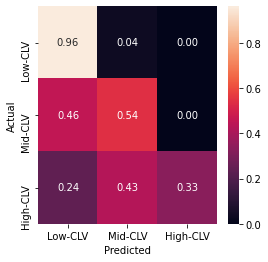

In [70]:
#confusion matrix
confusion_mat(confusion_matrix(y_test, y_pred_dt_opt))

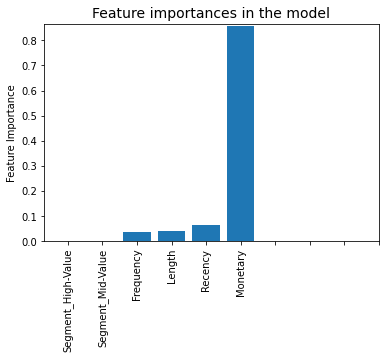

In [98]:
#checking the importance of different features of the best performing model
model_weights = pd.DataFrame(clf_dt_opt.feature_importances_, columns=['weight'], index=x_train.columns)
model_weights.sort_values('weight', inplace=True)

#plotting top 10 features of xgb model
plt.bar(model_weights.index[-10:], model_weights.weight[-10:], align='center') 
plt.title("Feature importances in the model", fontsize=14)
plt.ylabel("Feature Importance")
plt.xticks(range(10),rotation=90)
plt.margins(y=0.01)
plt.show()


Support Vector Machine Classifier

In [72]:
# SVM
clf_svm = svm.SVC(random_state=42)
#train the model using train set
clf_svm.fit(x_train,y_train)
#make predictions using the train set
y_pred_train_svm=clf_svm.predict(x_train)
#training accuracy
accuracy_svm= accuracy_score(y_train, y_pred_train_svm)
print("Accuracy of is ",accuracy_svm*100 )
#make predictions using the test set
y_pred_svm =clf_svm.predict(x_test)
#print the classification report
print(classification_report(y_test, y_pred_svm))
#testing accuracy
accuracy_svm_t= accuracy_score(y_test, y_pred_svm)
print("Accuracy of is ",accuracy_svm_t*100)

Accuracy of is  85.51783412118607
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       480
           1       0.54      0.38      0.45        81
           2       1.00      0.24      0.38        21

    accuracy                           0.86       582
   macro avg       0.81      0.53      0.59       582
weighted avg       0.85      0.86      0.85       582

Accuracy of is  86.25429553264605


In [73]:
#parameters used
print(clf_svm.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [99]:
train_start_time = time.time()
#implementing gridsearchcv

#parameters
param_grid = {'C': [0.1, 1, 10,100],'gamma': ['scale',1, 0.1, 0.01, 0.001, 0.0001]}

# Instantiate the grid search model
grid_search = GridSearchCV(clf_svm, param_grid=param_grid, scoring='f1_macro', cv=10)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
train_end_time = time.time()
print("Time taken:", round((train_end_time - train_start_time)/60,1))
#get best parameters
grid_search.best_params_

Time taken: 0.4


{'C': 100, 'gamma': 'scale'}

In [100]:
#Using tuned parameters
clf_svm_opt = svm.SVC(C=100,gamma='scale',random_state=42)
#train the model using train set
clf_svm_opt.fit(x_train,y_train)
#make predictions using the train set
y_pred_train_svm=clf_svm_opt.predict(x_train)
#training accuracy
accuracy_svm= accuracy_score(y_train, y_pred_train_svm)
print("Accuracy of is ",accuracy_svm*100)
#make predictions using the test set
y_pred_svm_opt =clf_svm_opt.predict(x_test)
#print the classification report
print(classification_report(y_test, y_pred_svm_opt))
#testing accuracy
accuracy_svm_opt_t= accuracy_score(y_test, y_pred_svm_opt)
print("Accuracy of is ",accuracy_svm_opt_t*100)

Accuracy of is  87.40868070477009
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       480
           1       0.60      0.48      0.53        81
           2       0.89      0.38      0.53        21

    accuracy                           0.87       582
   macro avg       0.80      0.61      0.67       582
weighted avg       0.86      0.87      0.86       582

Accuracy of is  87.2852233676976


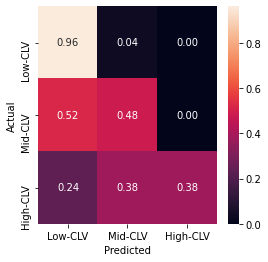

In [101]:
#confusion matrix
confusion_mat(confusion_matrix(y_test, y_pred_svm_opt))

Random Forest Classifier

In [77]:
# RF
clf_rf = RandomForestClassifier(random_state=42)
#train the model using train set
clf_rf.fit(x_train,y_train)
#make predictions using the train set
y_pred_train_rf=clf_rf.predict(x_train)
#training accuracy
accuracy_rf= accuracy_score(y_train, y_pred_train_rf)
print("Accuracy of is ",accuracy_rf*100)
#make predictions using the test set
y_pred_rf =clf_rf.predict(x_test)
#print the classification report
print(classification_report(y_test, y_pred_rf))
#testing accuracy
accuracy_rf_t= accuracy_score(y_test, y_pred_rf)
print("Accuracy of is ",accuracy_rf_t*100)

Accuracy of is  100.0
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       480
           1       0.59      0.54      0.57        81
           2       0.86      0.29      0.43        21

    accuracy                           0.88       582
   macro avg       0.79      0.60      0.64       582
weighted avg       0.87      0.88      0.87       582

Accuracy of is  87.62886597938144


In [78]:
#parameters used
print(clf_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [79]:
train_start_time = time.time()
#implementing gridsearchcv

#parameters
param_grid = {'n_estimators': [100,200,300,400,500], 'max_depth': [i for i in range(2,8)]}

# Instantiate the grid search model
grid_search = GridSearchCV(clf_rf, param_grid=param_grid, scoring='f1_macro', cv=10)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

train_end_time = time.time()
print("Time taken:", round((train_end_time - train_start_time)/60,1))
#get best parameters
grid_search.best_params_

Time taken: 3.3


{'max_depth': 7, 'n_estimators': 300}

In [80]:
#Using tuned parameters
clf_rf_opt = RandomForestClassifier(max_depth=7, n_estimators=300,random_state=42)
#train the model using train set
clf_rf_opt.fit(x_train,y_train)
#make predictions using the train set
y_pred_train_rf=clf_rf_opt.predict(x_train)
#training accuracy
accuracy_rf= accuracy_score(y_train, y_pred_train_rf)
print("Accuracy of is ",accuracy_rf*100)
#make predictions using the test set
y_pred_rf_opt =clf_rf_opt.predict(x_test)
#print the classification report
print(classification_report(y_test, y_pred_rf_opt))
#testing accuracy
accuracy_rf_opt_t= accuracy_score(y_test, y_pred_rf_opt)
print("Accuracy of is ",accuracy_rf_opt_t*100)

Accuracy of is  90.20197679415557
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       480
           1       0.60      0.54      0.57        81
           2       1.00      0.29      0.44        21

    accuracy                           0.88       582
   macro avg       0.84      0.60      0.65       582
weighted avg       0.88      0.88      0.87       582

Accuracy of is  87.97250859106529


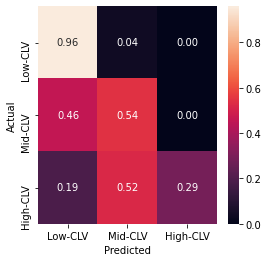

In [81]:
#confusion matrix
confusion_mat(confusion_matrix(y_test, y_pred_rf))

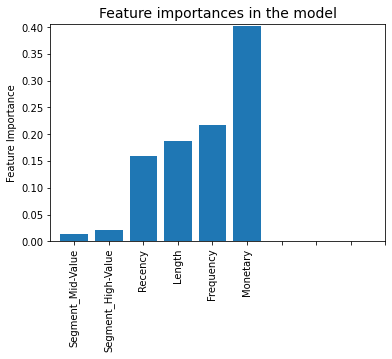

In [82]:
#checking the importance of different features of the best performing model
model_weights = pd.DataFrame(clf_rf.feature_importances_, columns=['weight'], index=x_train.columns)
model_weights.sort_values('weight', inplace=True)

#plotting top 10 features of xgb model
plt.bar(model_weights.index[-10:], model_weights.weight[-10:], align='center') 
plt.title("Feature importances in the model", fontsize=14)
plt.ylabel("Feature Importance")
plt.xticks(range(10),rotation=90)
plt.margins(y=0.01)
plt.show()


Gradient Boosting Classifier(XGB)

In [83]:
# XGB
clf_xgb = xgboost.XGBClassifier(random_state=42)
#train the model using train set
clf_xgb.fit(x_train,y_train)
#make predictions using the train set
y_pred_train_xgb=clf_xgb.predict(x_train)
#training accuracy
accuracy_xgb= accuracy_score(y_train, y_pred_train_xgb)
print("Accuracy of is ",accuracy_xgb*100)
#make predictions using the test set
y_pred_xgb =clf_xgb.predict(x_test)
#print the classification report
print(classification_report(y_test, y_pred_xgb))
#testing accuracy
accuracy_xgb_t= accuracy_score(y_test, y_pred_xgb)
print("Accuracy of is ",accuracy_xgb_t*100)

Accuracy of is  88.95573700042974
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       480
           1       0.61      0.52      0.56        81
           2       0.67      0.38      0.48        21

    accuracy                           0.88       582
   macro avg       0.73      0.62      0.66       582
weighted avg       0.87      0.88      0.87       582

Accuracy of is  87.80068728522336


In [84]:
#parameters used
print(clf_xgb.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'multi:softprob', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [85]:
#Using tuned parameters
train_start_time = time.time()
#implementing gridsearchcv

#parameters
param_grid = {'xgbclassifier__learning_rate': [0.1,0.01, 0.02], 'xgbclassifier__max_depth': [i for i in range(3,8)], 'xgbclassifier__n_estimators': [i for i in range(100,500,100)]}

# Instantiate the grid search model
grid_search = GridSearchCV(clf_xgb, param_grid=param_grid, scoring='f1_macro', cv=10)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
train_end_time = time.time()
print("Time taken:", round((train_end_time - train_start_time)/60,1))
#get best parameters
grid_search.best_params_

Time taken: 2.5


{'xgbclassifier__learning_rate': 0.1,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__n_estimators': 100}

In [86]:
#Using tuned parameters
clf_xgb_opt = xgboost.XGBClassifier(max_depth=3,n_estimators=100,learning_rate=0.1,random_state=42)
#train the model using train set
clf_xgb_opt.fit(x_train,y_train)
#make predictions using the train set
y_pred_train_xgb=clf_xgb_opt.predict(x_train)
#training accuracy
accuracy_xgb= accuracy_score(y_train, y_pred_train_xgb)
print("Accuracy of is ",accuracy_xgb)
#make predictions using the test set
y_pred_xgb_opt =clf_xgb_opt.predict(x_test)
#print the classification report
print(classification_report(y_test, y_pred_xgb_opt))
#testing accuracy
accuracy_xgb_opt_t= accuracy_score(y_test, y_pred_xgb_opt)
print("Accuracy of is ",accuracy_xgb_opt_t*100)

Accuracy of is  0.8895573700042974
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       480
           1       0.61      0.52      0.56        81
           2       0.67      0.38      0.48        21

    accuracy                           0.88       582
   macro avg       0.73      0.62      0.66       582
weighted avg       0.87      0.88      0.87       582

Accuracy of is  87.80068728522336


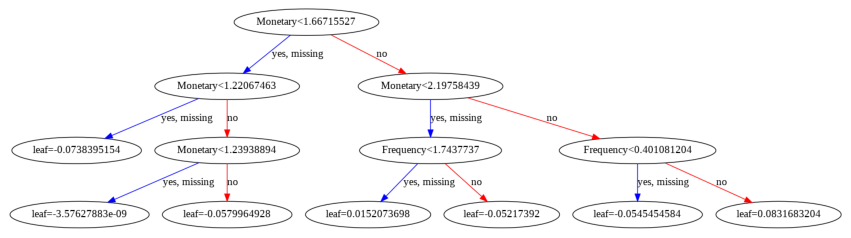

In [103]:
# # plot single tree of XGB model
from xgboost import plot_tree
plot_tree(clf_xgb_opt, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(15, 10)

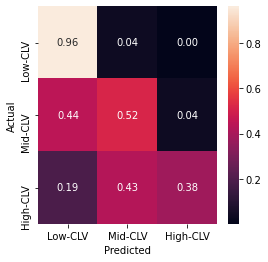

In [88]:
#confusion matrix
confusion_mat(confusion_matrix(y_test, y_pred_xgb_opt))

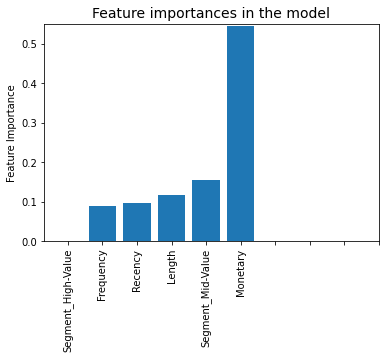

In [89]:
#checking the importance of different features of the best performing model
model_weights = pd.DataFrame(clf_xgb_opt.feature_importances_, columns=['weight'], index=x_train.columns)
model_weights.sort_values('weight', inplace=True)

#plotting top 10 features of xgb model
plt.bar(model_weights.index[-10:], model_weights.weight[-10:], align='center') 
plt.title("Feature importances in the model", fontsize=14)
plt.ylabel("Feature Importance")
plt.xticks(range(10),rotation=90)
plt.margins(y=0.01)
plt.show()
